In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
directory_path = "./MVDA/"
paths = os.listdir(directory_path)

In [4]:
import librosa
import librosa.display

In [5]:
def visualize_wav(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)

    # Create a time axis in seconds
    time = librosa.times_like(y)

    # Plot the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform of {}'.format(file_path))
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

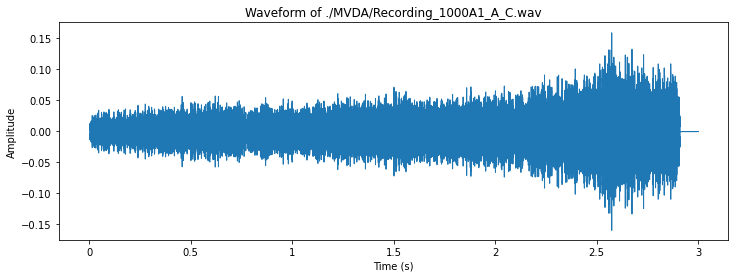

In [6]:
test_path = directory_path + paths[0]
visualize_wav(test_path)

In [11]:
def extract_attr(name):
    return name[-7:-4].split('_')
# extract(paths[0])

In [13]:
attr_of_instances = [extract_attr(path) for path in paths]

In [17]:
attr_matrix = [[0 for _ in range(4)] for _ in range(4)]

microphones = ['O','A','M','H']
labels = ['C','M','T','N']

for mic_name,v_label in attr_of_instances:
    row = microphones.index(mic_name)
    col = labels.index(v_label)
    attr_matrix[row][col] += 1

attr_matrix

[[1508, 1500, 1412, 2588],
 [1508, 1756, 1788, 1504],
 [920, 1160, 40, 8],
 [84, 72, 1068, 0]]

In [29]:
df = pd.DataFrame(attr_matrix)

df.index = microphones
df.columns = labels

# sum all columns
df['Sum'] = df.cumsum(axis=1).iloc[:, -1]

# sum all rows
df.loc['Sum'] = df.cumsum(axis=0).iloc[-1, :]

df

,C,M,T,N,Sum
O,1508,1500,1412,2588,7008
A,1508,1756,1788,1504,6556
M,920,1160,40,8,2128
H,84,72,1068,0,1224
Sum,4020,4488,4308,4100,16916
